In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
# Shuffle the Data 
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Select the first 1,00,000 rows
df = df.head(10000)

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,301,CASH_OUT,80646.44,C819258095,8298.00,0.00,C1433007346,222649.51,303295.96,0,0
9996,394,CASH_IN,57501.43,C1316678628,1355549.25,1413050.68,C483888900,342052.10,284550.67,0,0
9997,570,CASH_OUT,112497.83,C765932428,31327.00,0.00,C355959262,314691.28,427189.10,0,0
9998,402,PAYMENT,557.43,C2108927530,288151.00,287593.57,M918034835,0.00,0.00,0,0


In [151]:
df
# The dataset consists of 63,62,620 observations.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,301,CASH_OUT,80646.44,C819258095,8298.00,0.00,C1433007346,222649.51,303295.96,0,0
9996,394,CASH_IN,57501.43,C1316678628,1355549.25,1413050.68,C483888900,342052.10,284550.67,0,0
9997,570,CASH_OUT,112497.83,C765932428,31327.00,0.00,C355959262,314691.28,427189.10,0,0
9998,402,PAYMENT,557.43,C2108927530,288151.00,287593.57,M918034835,0.00,0.00,0,0


In [97]:
# View data (to give you first five rows)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,237,TRANSFER,35911.20,C1349435850,301885.00,265973.80,C2059262944,567731.26,603642.46,0,0
1,157,CASH_IN,34021.33,C2079545670,4347317.94,4381339.28,C1052878928,544497.20,510475.87,0,0
2,324,CASH_IN,89355.68,C369322363,782.00,90137.68,C397644820,133043.62,43687.94,0,0
3,11,CASH_OUT,27697.40,C2089692083,48.00,0.00,C286738540,674135.52,701832.91,0,0
4,254,CASH_OUT,389.27,C1262215312,13489.20,13099.93,C1827377386,202995.39,203384.66,0,0


In [98]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9995,276,CASH_OUT,156619.25,C384169490,3076.0,0.00,C1123686650,0.00,156619.25,0,0
9996,254,TRANSFER,271659.67,C501533000,0.0,0.00,C1348815716,2988867.17,3260526.84,0,0
9997,308,PAYMENT,22663.44,C986403623,0.0,0.00,M1209482928,0.00,0.00,0,0
9998,43,CASH_IN,113962.43,C1762015941,20121.0,134083.43,C1389074037,28817.42,0.00,0,0
9999,138,CASH_OUT,160757.90,C435727829,0.0,0.00,C2137390232,387094.55,547852.45,0,0


In [99]:
# statistical analysis of the data

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000,10000.0000
mean,243.990100,1.737107e+05,9.050636e+05,9.272651e+05,1.063047e+06,1.184138e+06,0.00190,0.0001
std,141.704463,4.662073e+05,3.086712e+06,3.122753e+06,2.840653e+06,3.034161e+06,0.04355,0.0100
min,1.000000,1.260000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0000
25%,156.000000,1.341284e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0000
50%,249.000000,7.420973e+04,1.409942e+04,0.000000e+00,1.345331e+05,2.118248e+05,0.00000,0.0000
75%,345.250000,2.058379e+05,1.088195e+05,1.573190e+05,9.483795e+05,1.114265e+06,0.00000,0.0000
max,717.000000,1.727101e+07,3.359321e+07,3.374855e+07,9.234964e+07,9.261398e+07,1.00000,1.0000


In [100]:
#Data Verification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB


In [101]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [102]:
df.shape

(10000, 11)

In [103]:
# fd = df.groupby('type').size()
# fd
print(df.type.value_counts())


type
CASH_OUT    3500
PAYMENT     3383
CASH_IN     2224
TRANSFER     835
DEBIT         58
Name: count, dtype: int64


In [104]:
#  Checking how many missing values each column contains

df.isnull().sum()
# There are no missing values.


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [105]:
# Check duplicate values
df.duplicated().sum()



0

In [ ]:
# There are no duplicate values.# 

In [106]:
df.isFraud.value_counts()


isFraud
0    9981
1      19
Name: count, dtype: int64

In [107]:
fraud_percentage = (8213/6362620)*100
nonfraud_percentage = (6354407/6362620)*100

print(f"""We can see that this dataset is very imbalanced with fraud transaction only {fraud_percentage:.1f}% and 
    non-fraud transaction {nonfraud_percentage:.1f}%, This is expected of this kind of dataset because there is 
    no way majority of our transaction are to be fraud else there is something wrong with the system.""")

We can see that this dataset is very imbalanced with fraud transaction only 0.1% and 
    non-fraud transaction 99.9%, This is expected of this kind of dataset because there is 
    no way majority of our transaction are to be fraud else there is something wrong with the system.


In [108]:
# defining a dataset containing only payment type of transactions

datapayment = df.loc[df['type'] == 'PAYMENT']

datapayment = pd.DataFrame(datapayment)

datapayment.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5,234,PAYMENT,2398.16,C229923928,0.00,0.00,M482244351,0.0,0.0,0,0
7,402,PAYMENT,18367.37,C219164201,21187.00,2819.63,M936536987,0.0,0.0,0,0
10,182,PAYMENT,2588.54,C1173615080,41547.00,38958.46,M531725823,0.0,0.0,0,0
14,142,PAYMENT,8280.95,C1578120005,103981.13,95700.18,M1598671677,0.0,0.0,0,0
16,303,PAYMENT,40760.25,C1913346275,31147.00,0.00,M1005627161,0.0,0.0,0,0
22,393,PAYMENT,50737.82,C23552834,0.00,0.00,M1105201056,0.0,0.0,0,0
23,142,PAYMENT,4618.51,C10873201,2523.00,0.00,M2018218703,0.0,0.0,0,0
25,227,PAYMENT,2406.93,C2141398877,0.00,0.00,M166963975,0.0,0.0,0,0
28,209,PAYMENT,10534.61,C615389868,102512.00,91977.40,M426667936,0.0,0.0,0,0
29,140,PAYMENT,7920.52,C773890759,43558.00,35637.48,M2011283784,0.0,0.0,0,0


In [109]:

df['errorBalanceOrig'] = df.newbalanceOrig + df.amount - df.oldbalanceOrg
df['errorBalanceDest'] = df.oldbalanceDest + df.amount - df.newbalanceDest
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,237,TRANSFER,35911.20,C1349435850,301885.00,265973.80,C2059262944,567731.26,603642.46,0,0,0.00,0.00
1,157,CASH_IN,34021.33,C2079545670,4347317.94,4381339.28,C1052878928,544497.20,510475.87,0,0,68042.67,68042.66
2,324,CASH_IN,89355.68,C369322363,782.00,90137.68,C397644820,133043.62,43687.94,0,0,178711.36,178711.36
3,11,CASH_OUT,27697.40,C2089692083,48.00,0.00,C286738540,674135.52,701832.91,0,0,27649.40,0.01
4,254,CASH_OUT,389.27,C1262215312,13489.20,13099.93,C1827377386,202995.39,203384.66,0,0,0.00,0.00


In [110]:
df[['type','amount']]

,type,amount
0,TRANSFER,35911.20
1,CASH_IN,34021.33
2,CASH_IN,89355.68
3,CASH_OUT,27697.40
4,CASH_OUT,389.27
...,...,...
9995,CASH_OUT,156619.25
9996,TRANSFER,271659.67
9997,PAYMENT,22663.44
9998,CASH_IN,113962.43


In [ ]:
#Visualization

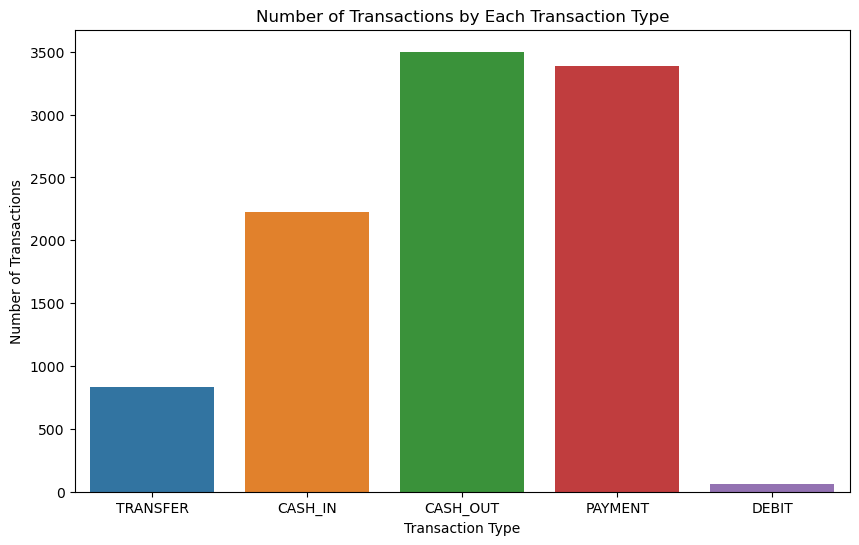

In [111]:
#Bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Number of Transactions by Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

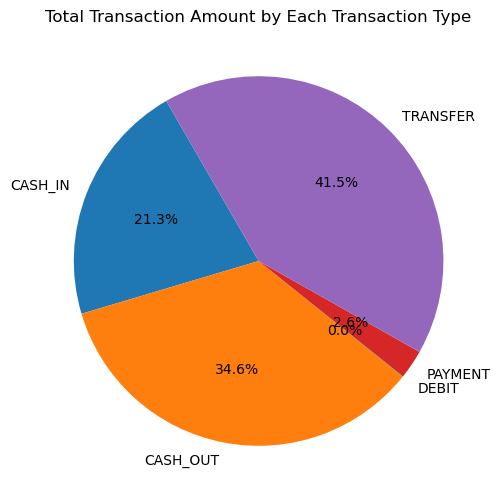

In [114]:
transaction_amounts = df.groupby('type')['amount'].sum()

# Create a pie chart for the total transaction amount by each transaction type
plt.figure(figsize=(10, 6))
plt.pie(transaction_amounts, labels=transaction_amounts.index, autopct='%1.1f%%', startangle=120)
plt.title('Total Transaction Amount by Each Transaction Type')
plt.show()

In [115]:
fd = df.groupby('type').size()
fd

type
CASH_IN     2224
CASH_OUT    3500
DEBIT         58
PAYMENT     3383
TRANSFER     835
dtype: int64

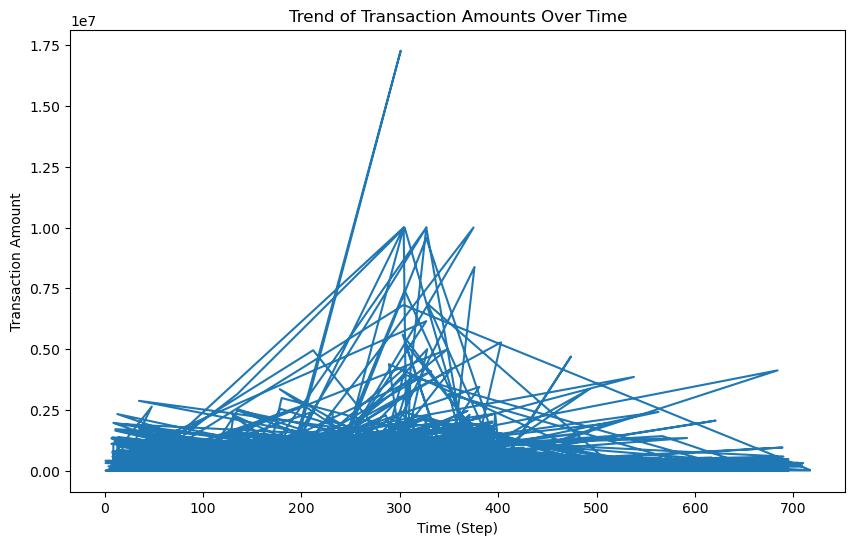

In [179]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['step'], df['amount'], linestyle='-')
plt.xlabel('Time (Step)')
plt.ylabel('Transaction Amount')
plt.title('Trend of Transaction Amounts Over Time')
plt.show()
# The below graph indicates that a step value of approx. 300 corresponds to the maximum 
# amount transfered to a recipient.

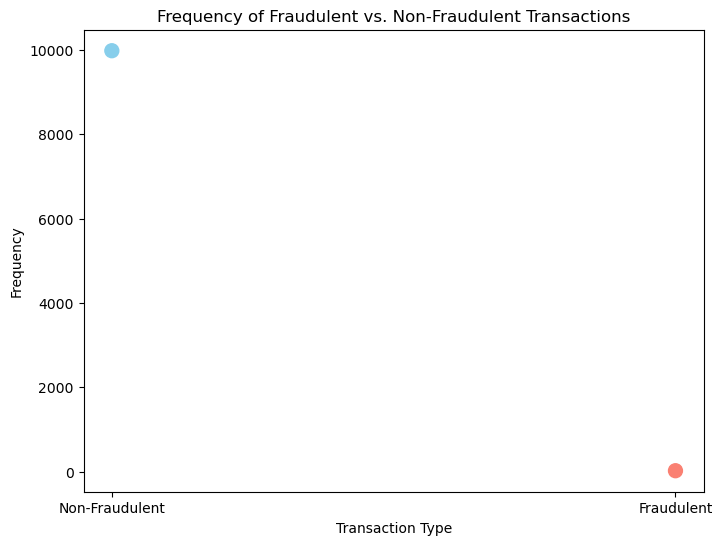

In [117]:
#scatter plot
fcounts = df['isFraud'].value_counts()
plt.figure(figsize=(8, 6))
plt.scatter(fcounts.index, fcounts.values, c=['skyblue','salmon'], s=100)
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Frequency of Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks([0, 1],['Non-Fraudulent','Fraudulent'], rotation=0)
plt.show()


In [17]:
ct=pd.crosstab(index=df.type,columns=df.isFraud)
ct
 

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<Axes: xlabel='type'>

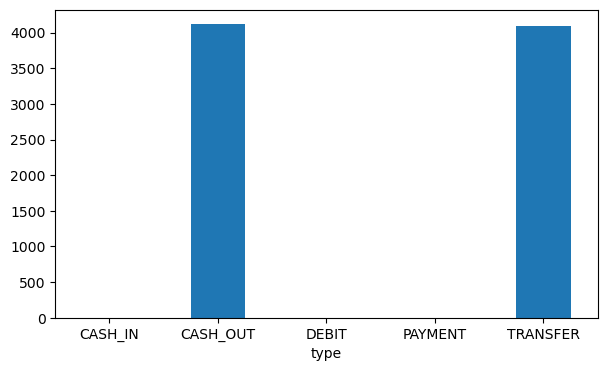

In [18]:
ct[1].plot.bar(figsize=(7,4), rot=0)


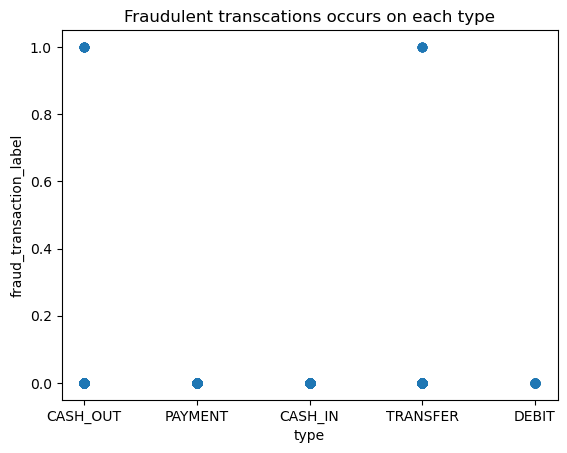

In [121]:
plt.scatter(x='type',y='isFraud',data=df)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')
plt.title('Fraudulent transcations occurs on each type')
plt.show()
# Fraudulent transactions only occur in transfer and cash_out types.


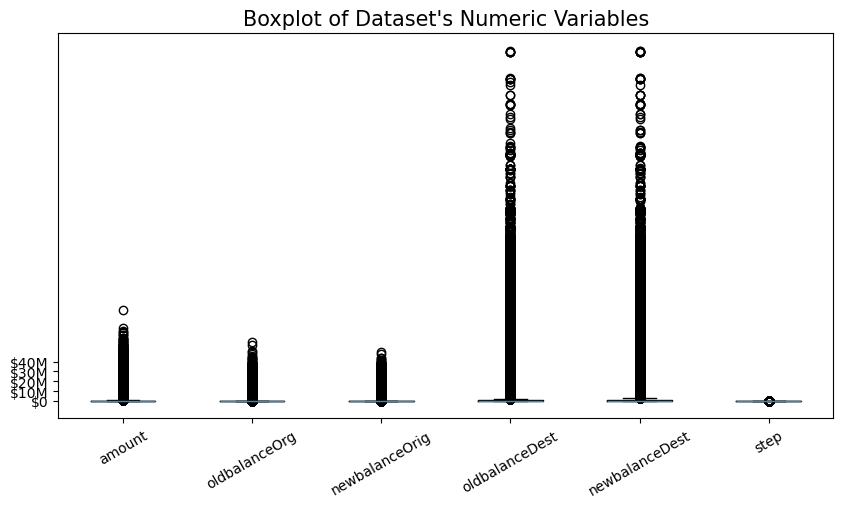

In [20]:
# df.boxplot(column='amount', by='isFraud')
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','step']
fig, ax = plt.subplots(figsize=(10,5)) 
plt.boxplot(x=df[num_columns])
ax.set_xticklabels(num_columns, rotation=30)  
ax.set_yticks(range(0,50000000,10000000)) 
ax.set_yticklabels(['$0', '$10M', '$20M', '$30M', '$40M']) 
plt.title("Boxplot of Dataset's Numeric Variables", fontsize=15)  
plt.style.use('ggplot')  
plt.show()  

In [21]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  0.0
Maximum:  92445516.64


In [22]:
df.amount

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

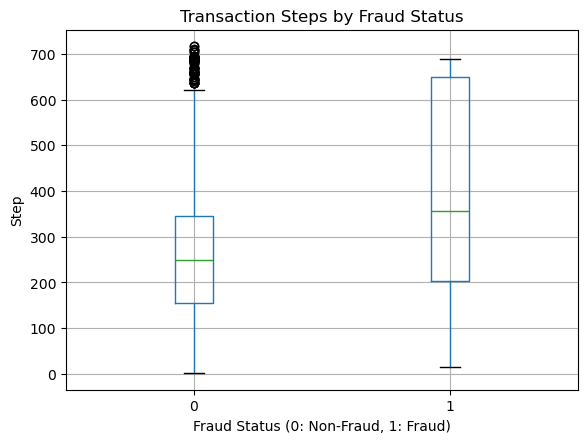

In [153]:
df.boxplot(column='step', by='isFraud')
plt.title('Transaction Steps by Fraud Status')
plt.suptitle('')  # Suppress the default 'Boxplot grouped by' title
plt.xlabel('Fraud Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Step')
plt.show()

In [ ]:
# Fraud amount transaction range is between 190-560 

In [39]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount
# Now, we can see that among them most occured were around 340,000-360,000 (3.4-3.6 lakh)



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3760283,279,CASH_OUT,10000000.0,C1214015158,10000000.00,0.00,C2110157840,0.00,10000000.00,1,0
5987587,409,CASH_OUT,10000000.0,C97242201,10000000.00,0.00,C786701128,8496.86,10008496.86,1,0
1707592,160,CASH_OUT,10000000.0,C525906402,10000000.00,0.00,C43869769,2145275.47,12145275.47,1,0
1707591,160,TRANSFER,10000000.0,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1,0
1707590,160,CASH_OUT,10000000.0,C2068007279,10000000.00,0.00,C836488544,158643.25,10158643.25,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5996410,425,CASH_OUT,0.0,C69493310,0.00,0.00,C719711728,2921531.34,2921531.34,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.00,0.00,C1462759334,76759.90,76759.90,1,0
6362461,730,CASH_OUT,0.0,C729003789,0.00,0.00,C1388096959,1008609.53,1008609.53,1,0
6362463,730,CASH_OUT,0.0,C2088151490,0.00,0.00,C1156763710,0.00,0.00,1,0


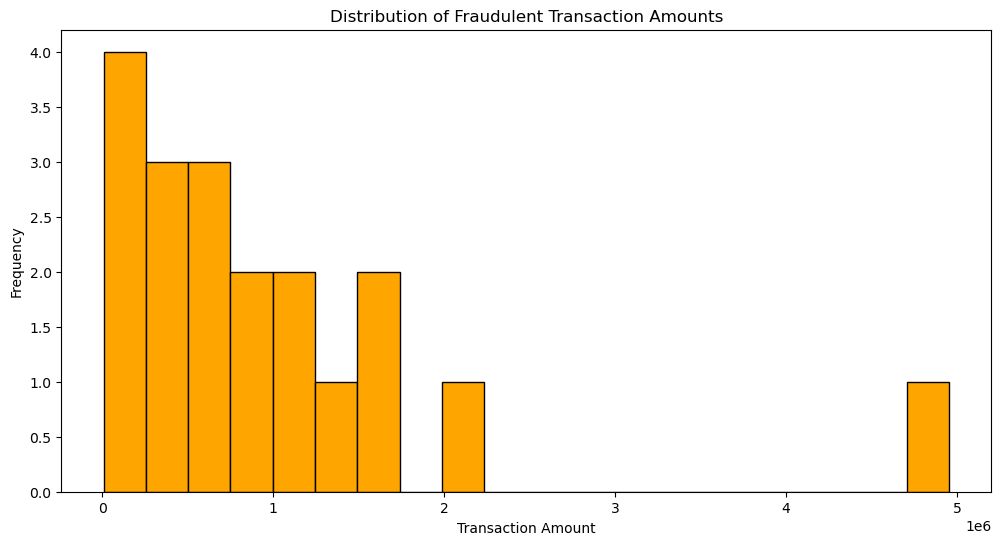

In [180]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount.amount.plot(kind='hist', bins=20, figsize=(12,6), facecolor='orange',edgecolor='black')
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Recipient Account')

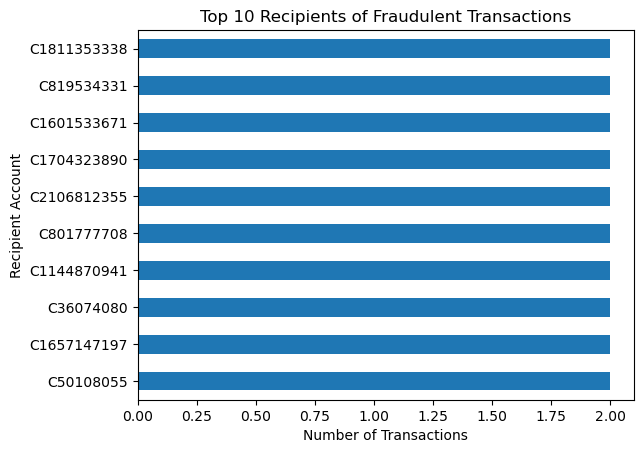

In [181]:
fraudster= df.nameDest.value_counts()
fraudster[:10]
fraudster[:10].plot(kind='barh')
plt.title('Top 10 Recipients of Fraudulent Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Recipient Account')

In [27]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  0.0
Maximum:  92445516.64


In [162]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
548,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1


From the total of 63 lakh records only 1 were assumed and flagged as fraud, which is
actually a very low number. The actual fraud happend has a very higher value when compared to 
isFlaggedFraud column.

Now let's look at how many values they assumed and flagged as fraud is actually correct

In [163]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud


19

In [164]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud


1

In [166]:

flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  5.263
Percentage of incorrectly flagged fraud:  94.737


In [167]:
flagged_fraud_records.shape


(1, 11)

This denotes that all the records which were flagged as fraud were correct.



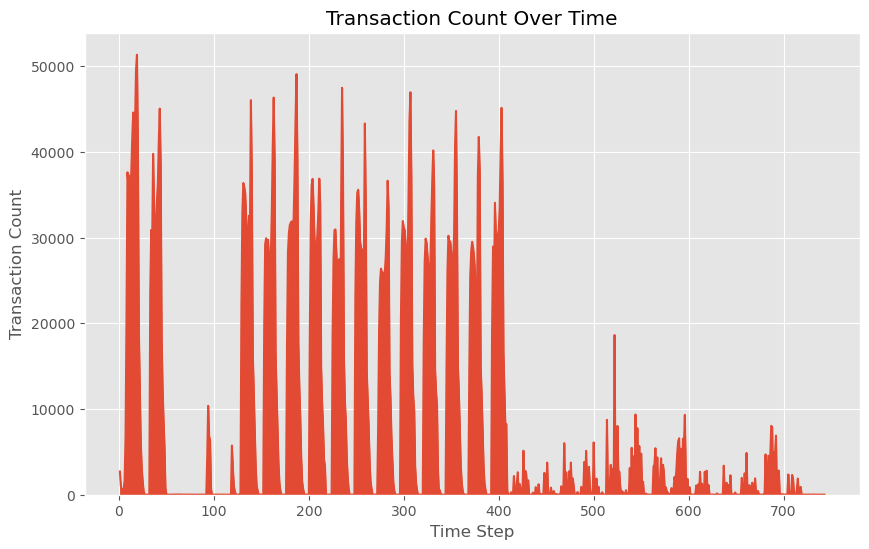

In [33]:
# Group the data by the 'step' column and count the number of transactions for each step
transactions_count = df.groupby('step').size()

# area plot
plt.figure(figsize=(10, 6))
transactions_count.plot.area()
plt.title('Transaction Count Over Time')
plt.xlabel('Time Step')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()


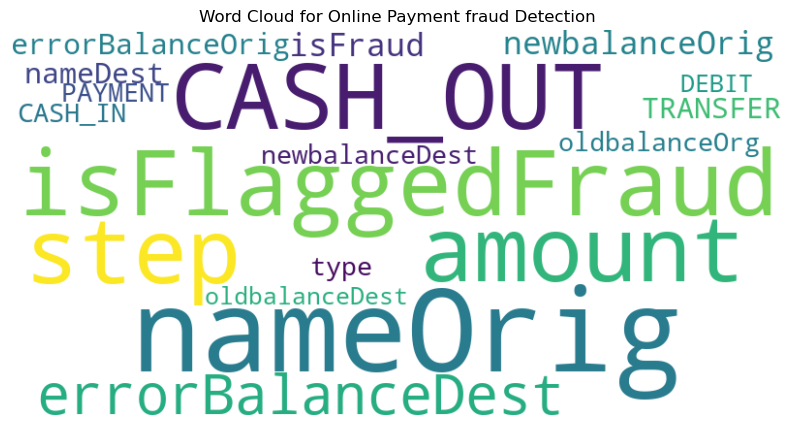

In [133]:
from wordcloud import WordCloud

# Combine the text data from column names, nameOrig, nameDest, and type
unique_words =  set(df.columns.tolist()) | set(df['type'])
text_data = ' '.join(unique_words)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Online Payment fraud Detection')
plt.show()


The area plot indicates higher transaction numbers during the initial 50 time steps
followed by anothe time steps 100 to 400.

D:\jiptrt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


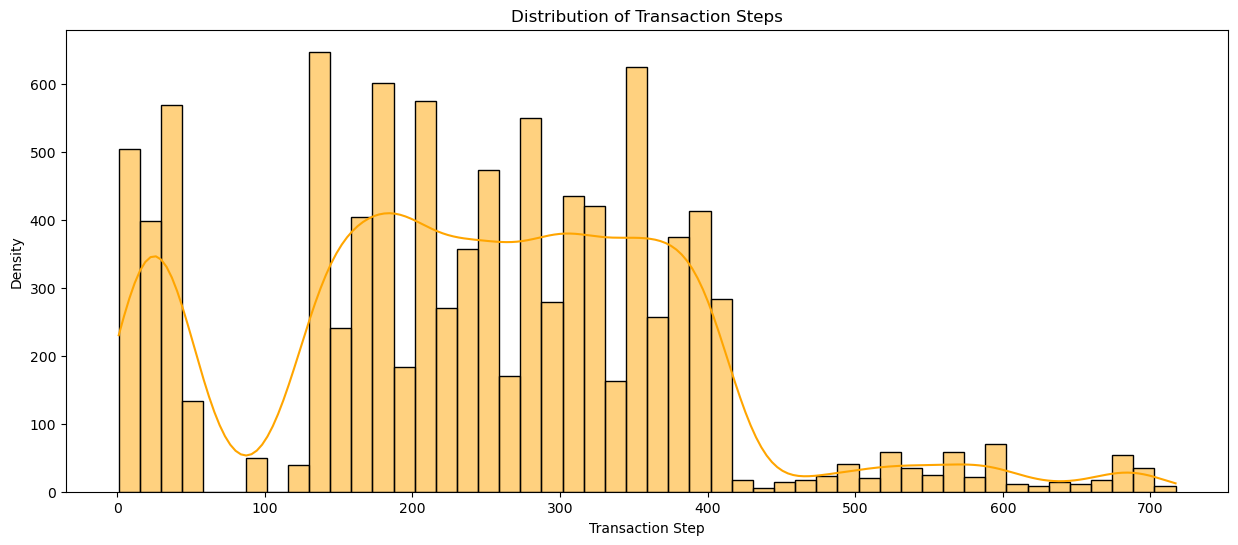

In [136]:
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.histplot(df['step'], bins=50, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Transaction Steps')
plt.xlabel('Transaction Step')
plt.ylabel('Density')
plt.show()

In [ ]:
There is a maximum distribution of 150 to 400 of step



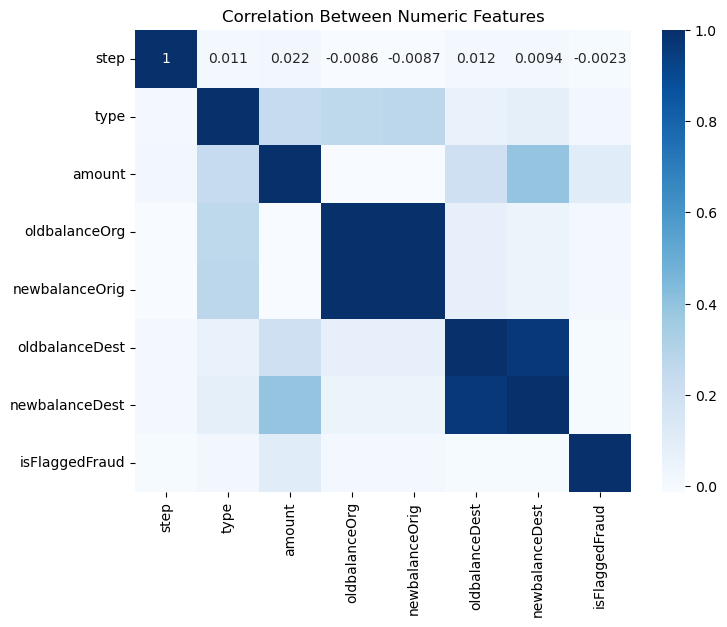

In [240]:
numeric_df = df.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title('Correlation Between Numeric Features')
plt.show()

In [236]:
 # Transformation (Categorical data into Numerical data)
# Now let’s transform the categorical features into numerical. Here we will also transform the values of the isFraud column into 
# No Fraud and Fraud labels to have a better understanding of the output
# Changing CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5 

df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   278     3   330218.42   C632336343       20866.00       351084.42   
1    15     2    11647.08  C1264712553       30370.00        18722.92   
2    10     3   152264.21  C1746846248      106589.00       258853.21   
3   403     4  1551760.63   C333676753           0.00            0.00   
4   206     3    78172.30   C813403091     2921331.58      2999503.88   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0   C834976624       452419.57       122201.15  No Fraud               0  
1   M215391829            0.00            0.00  No Fraud               0  
2  C1607284477       201303.01        49038.80  No Fraud               0  
3  C1564353608      3198359.45      4750120.08  No Fraud               0  
4  C1091768874       415821.90       337649.60  No Fraud               0  


In [230]:
from sklearn.model_selection import train_test_split
X = df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y = df['isFraud']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: isFraud, Length: 10000, dtype: int64

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape

(8000, 4)

In [232]:
X_test.shape

(2000, 4)

In [233]:
y_train.shape

(8000,)

In [234]:
y_test.shape

(2000,)

Training and Predicting


In [169]:
#Our model gives the 100% of accuracy.

X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.00,0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.00,0,0.0,1.0,0.0
2,2,353874.22,1200.0,0.00,200000.0,553874.22,0,0.0,0.0,1.0
3,2,91347.12,300000.0,208652.88,0.0,91347.12,0,1.0,0.0,0.0


# Model Testing
The model is very good at classifyng the fraud transaction. We used machine learning algorithms such as DecisionTreeClassifier to predict the online
payment Fraud. And accuracy is around the 99% for this model.

 

In [249]:
# Importing the Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression instance
lr_model = LogisticRegression(max_iter=500)

# Training the Logistic Regression model on our test data
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [250]:
# Importing the Random Forest machine learning library
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest instance
rf_model = RandomForestClassifier()

# Training the Random Forest model on our test data
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [252]:
# spliting data into train_test_split
x=df.loc[:, df.columns!='isFraud']
y=df['isFraud']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, stratify=df['isFraud'], random_state=1)
print(len(df),len(x_train),len(y_test))

10000 8000 2000


In [262]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Define features and target variable
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis='columns')
y = df['isFraud']

# One-Hot Encoding of the 'type' column
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['type']]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['type']))

# Combine encoded columns with original data
X = X.join(X_encoded_df).drop(['type'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42, sampling_strategy='not majority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the models
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)  # Reduced number of neighbors
lr_model = LogisticRegression(random_state=42)

# Train the models
dtc.fit(X_train_smote, y_train_smote)
rfc.fit(X_train_smote, y_train_smote)
knn.fit(X_train_smote, y_train_smote)
lr_model.fit(X_train_smote, y_train_smote)

# Test the models
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = model.predict(X_test)

# Print the accuracy scores and classification reports for each model
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt)*100)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc)*100)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print()

print("K-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
# print("Recall:", recall_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print()


Decision Tree Results:
Accuracy: 99.52499999999999
              precision    recall  f1-score   support

       Fraud       0.24      0.62      0.34         8
    No Fraud       1.00      1.00      1.00      3992

    accuracy                           1.00      4000
   macro avg       0.62      0.81      0.67      4000
weighted avg       1.00      1.00      1.00      4000

[[   5    3]
 [  16 3976]]
Random Forest Results:
Accuracy: 99.65
              precision    recall  f1-score   support

       Fraud       0.31      0.62      0.42         8
    No Fraud       1.00      1.00      1.00      3992

    accuracy                           1.00      4000
   macro avg       0.66      0.81      0.71      4000
weighted avg       1.00      1.00      1.00      4000

[[   5    3]
 [  11 3981]]

K-Nearest Neighbors Results:
Accuracy: 98.825
              precision    recall  f1-score   support

       Fraud       0.12      0.75      0.20         8
    No Fraud       1.00      0.99      0.99   